<a href="https://colab.research.google.com/github/Vineetttt/MachineLearning-II/blob/main/CNN_MNIST(Optimizer%20Accuracy%20Comparison).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CNN (MNIST DIGIT DATASET)**


Insert Code wherever represented with "#***************#"

# Importing Libraries

In [1]:
import keras
import cv2
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential , load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.utils import plot_model

# Data Preprocessing

11490434/11490434 [==============================] - 0s 0us/step


<ipython-input-2-8278da15a130>:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,2,i+1)


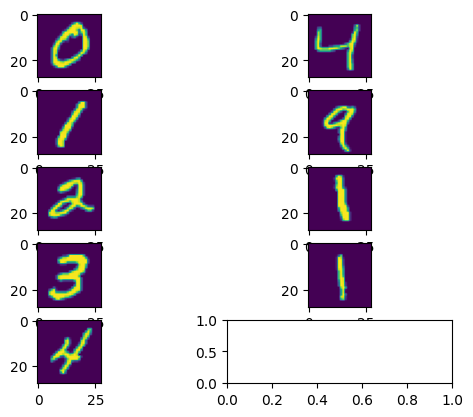

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train= x_train.reshape(60000,28,28)

x_test= x_test.reshape(x_test.shape[0],28,28)

input_shape=(28,28,1)

y_train=keras.utils.to_categorical(y_train,10)

y_test=keras.utils.to_categorical(y_test,10)

x_train= x_train.astype('float32')
x_test= x_test.astype('float32')

for i in range(10):
  plt.imshow(x_train[i])
  plt.subplot(5,2,i+1)

# Build CNN Model

In [3]:
x_train /= 255
x_test /=255
model = None  #Initialize model here


'''
Define batch size of 64 ,
No of classes (interpret from data)
Train for 2 epochs on every model

'''
batch_size = 64
num_classes = 10
epochs = 5
model = Sequential()

def build_model(optimizer):

  '''
  Define a sequential model with categorical cross entropy as loss function consisting
  2 convolution and 2 pooling layers with relu as activation function followed by
  droput -> flatten -> dense -> dropout -> dense

  Convolution layer - (kernel size = (3*3))
  Pooling layer - (pool size = (2*2))

  '''
  model = Sequential()
  model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(256,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy,optimizer=optimizer, metrics=['accuracy'])
  model.summary()

  return model

****************************************************************************************************************************************
Optimizer =  Adadelta
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)         

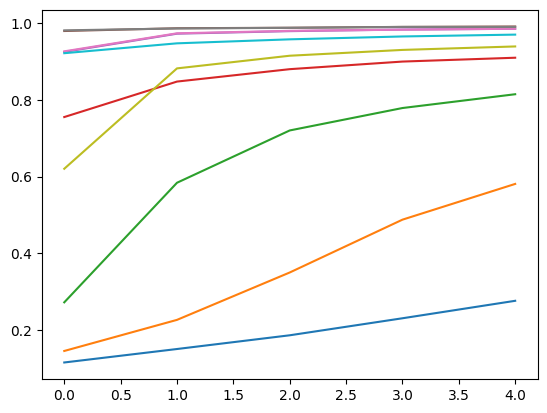

In [4]:
results_table = []

optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']

for optimizer in optimizers:
    print("****************************************************************************************************************************************")
    print("Optimizer = ",optimizer)
    model = build_model(optimizer)

    plot_model(model, to_file="mnist model"+ '.jpg', show_shapes=True)
    hist=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test))
    y1=hist.history['accuracy']
    y2=hist.history['val_accuracy']
    plt.plot(y1)
    plt.plot(y2)
    results_table.append([optimizer, np.max(y1), np.max(y2)])

In [5]:
print("\n\nTable of Results:")
print("Optimizer".ljust(15), "Training Accuracy".ljust(20), "Validation Accuracy".ljust(20))
for row in results_table:
  print(row[0].ljust(15), str(row[1]).ljust(20), str(row[2]).ljust(20))



Table of Results:
Optimizer       Training Accuracy    Validation Accuracy 
Adadelta        0.27656665444374084  0.5809999704360962  
Adagrad         0.8146166801452637   0.9096999764442444  
Adam            0.9850500226020813   0.991100013256073   
RMSprop         0.9852166771888733   0.9898999929428101  
SGD             0.9390833377838135   0.9699000120162964  
